# ML class final project part1
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        for k in range(len(j)):
            try:
                img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                
                histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                
                dst = cv2.Canny(img, 50, 200, None, 3)
                dst1 = cv2.Canny(img, 50, 200, None, 3)
                lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                
                gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                gray = cv2.medianBlur(gray, 5)
                rows = gray.shape[0]
                circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                param1=100, param2=30,
                                minRadius=10, maxRadius=100)
                
                my_list=[]
                my_list.append(folder+"/"+i+"/"+j[k])
                my_list.append(i)
                my_list.append(c)
                if lines is None:
                    my_list.append(0)
                    my_list.append(0)   
                else:
                    my_list.append(1)
                    my_list.append(len(lines))
                if circles is None:
                    my_list.append(0)
                    my_list.append(0)   
                else:
                    my_list.append(1)
                    my_list.append(circles.shape[1])
                
                my_list.extend(histogram_r)
                my_list.extend(histogram_g)
                my_list.extend(histogram_b)
                # my_list.extend(img.flatten())
                # my_list.extend(dst.flatten())

                big_list.append(my_list)
                count+=1
                
            except:
                print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    # for h in range(200*200*3):
    #     cols.append("i"+str(h))
    # for h in range(200*200):
    #     cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_df.shape
# full_ball_df.head()

In [5]:
# full_ball_df.to_csv('small_hist.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [7]:
# full_test_df.to_csv('final_test_data_small_hist.csv', index=False)

import the data with some/all features

In [8]:
small_hist = pd.read_csv('small_hist.csv')
del small_hist['path']
del small_hist['class_name']
ball_type = [0,2,9,11]
small_hist_4balls = small_hist.loc[small_hist['class_number'].isin(ball_type)]
small_hist_4balls.shape

(1533, 773)

In [75]:
small_hist_test = pd.read_csv('final_test_data_small_hist.csv')
del small_hist_test['path']
del small_hist_test['class_name']
ball_type = [0,2,9,11]
small_hist_4balls_test = small_hist_test.loc[small_hist_test['class_number'].isin(ball_type)]
small_hist_4balls_test.shape
final_test_y = small_hist_4balls_test['class_number']
final_test_X = small_hist_4balls_test.drop(['class_number'], axis=1)


In [10]:

X1 = small_hist_4balls.iloc[:,1:5]
X2 = small_hist_4balls.iloc[:,5:] 
X3 = small_hist_4balls.drop(['class_number'], axis=1)

y = small_hist_4balls['class_number']

In [11]:
X1.head()

,lines?,#lines,circles?,#circles
0,1,36,1,5
1,1,207,1,6
2,1,55,1,5
3,1,196,1,1
4,1,291,1,12


In [12]:
X2.head()

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b246,b247,b248,b249,b250,b251,b252,b253,b254,b255
0,2,3,9,16,12,17,25,29,32,36,...,184,182,211,246,339,425,438,605,964,16964
1,2,4,28,29,60,54,112,77,139,153,...,115,77,135,98,192,162,305,285,359,14412
2,0,0,2,6,13,24,67,100,180,175,...,4,5,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,28,28,28,35,84,113,233,241,515,19743
4,4529,4546,1537,812,577,463,427,362,255,238,...,126,128,122,123,139,135,161,168,184,130


In [13]:
X3.head()

,lines?,#lines,circles?,#circles,r0,r1,r2,r3,r4,r5,...,b246,b247,b248,b249,b250,b251,b252,b253,b254,b255
0,1,36,1,5,2,3,9,16,12,17,...,184,182,211,246,339,425,438,605,964,16964
1,1,207,1,6,2,4,28,29,60,54,...,115,77,135,98,192,162,305,285,359,14412
2,1,55,1,5,0,0,2,6,13,24,...,4,5,0,0,1,0,0,0,0,0
3,1,196,1,1,0,0,0,0,0,0,...,28,28,28,35,84,113,233,241,515,19743
4,1,291,1,12,4529,4546,1537,812,577,463,...,126,128,122,123,139,135,161,168,184,130


train test split

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)


extra functions

In [15]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [16]:
# list to hold all final results
results=[]

model imports

In [17]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import PCA

# RUN ON DATA SET WITH LINES AND CIRCLES 

#### SVM

In [18]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 36.74 %


squared_hinge l2 32.83 %
OutputCodeClassifier
hinge l2 42.83 %
squared_hinge l2 36.96 %
OneVsRestClassifier
hinge l2 32.39 %
squared_hinge l2 36.74 %


              precision    recall  f1-score   support

           0       0.32      0.23      0.26       110
           2       0.52      0.22      0.31       100
           9       0.29      0.61      0.40       111
          11       0.51      0.39      0.44       139

    accuracy                           0.37       460
   macro avg       0.41      0.36      0.35       460
weighted avg       0.41      0.37      0.36       460

36.74 %


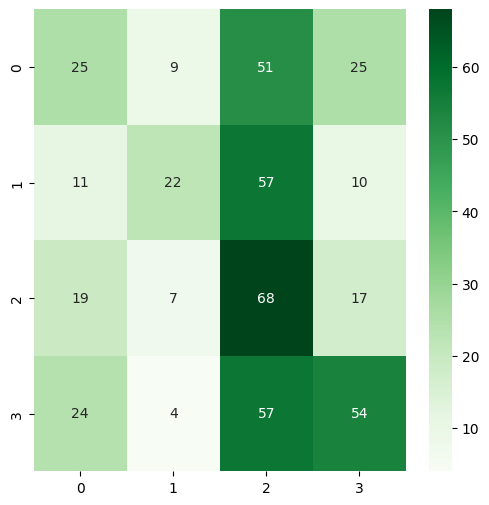

In [19]:
svm1 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train1, y_train1)
pred_svm1 = svm1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_svm1))
print(classification_report(y_test1, pred_svm1))
print(round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'SVM',round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100 ])

#### KNN

In [20]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train1,y_train1)
    pred_knn = neigh.predict(X_test1)
    print(i,round(np.sum([y_test1==pred_knn])/len(y_test1),4)*100,"%")

1 37.169999999999995 %
2 35.43 %
3 37.61 %
4 39.57 %
5 38.7 %
6 40.0 %
7 40.65 %
8 41.089999999999996 %
9 36.09 %
10 39.78 %
11 39.35 %
12 38.48 %
13 39.35 %
14 39.35 %
15 39.57 %
16 38.26 %
17 38.48 %
18 39.78 %
19 38.91 %
20 38.7 %
21 39.78 %
22 41.52 %
23 40.43 %
24 40.0 %
25 39.57 %
26 40.0 %
27 40.0 %
28 39.57 %
29 38.48 %
30 38.7 %
31 39.57 %
32 39.78 %
33 39.129999999999995 %
34 39.78 %
35 39.57 %
36 40.0 %
37 39.129999999999995 %
38 38.7 %
39 39.78 %
40 39.35 %
41 39.35 %
42 39.35 %
43 38.7 %
44 38.91 %
45 38.91 %
46 39.57 %
47 39.35 %
48 40.87 %
49 40.43 %
50 39.78 %


              precision    recall  f1-score   support

           0       0.32      0.39      0.35       110
           2       0.44      0.37      0.40       100
           9       0.41      0.40      0.40       111
          11       0.49      0.47      0.48       139

    accuracy                           0.41       460
   macro avg       0.41      0.41      0.41       460
weighted avg       0.42      0.41      0.41       460

41.089999999999996 %


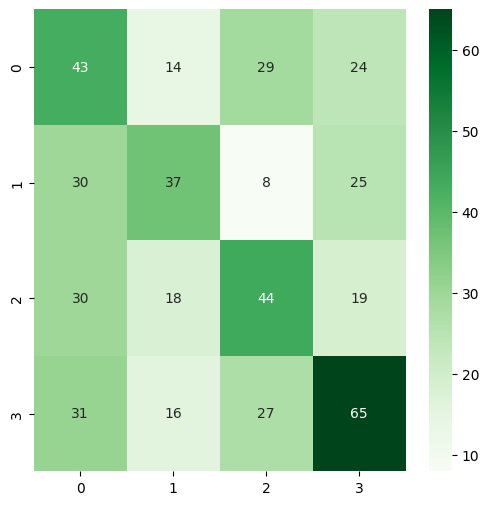

In [21]:
neigh1 = KNeighborsClassifier(n_neighbors=8)
neigh1.fit(X_train1,y_train1)
pred_knn1 = neigh1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_knn1))
print(classification_report(y_test1, pred_knn1))
print(round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'KNN',round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100 ])

#### Adaboost

In [22]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train1,y_train1)
    pred_ada = ada.predict(X_test1)
    print(i,round(np.sum([y_test1==pred_ada])/len(y_test1),4)*100,"%")

50 42.61 %
100 41.52 %
150 42.17 %
200 42.39 %
250 42.17 %
300 42.39 %
350 42.17 %
400 41.52 %
450 42.17 %
500 42.17 %
550 42.17 %
600 42.39 %
650 42.17 %
700 42.83 %
750 42.39 %
800 43.04 %
850 42.61 %
900 43.04 %
950 43.26 %
1000 43.26 %
1050 42.39 %
1100 43.480000000000004 %
1150 43.7 %
1200 43.7 %
1250 43.7 %
1300 43.480000000000004 %
1350 43.7 %
1400 43.7 %
1450 43.7 %
1500 43.91 %
1550 43.7 %
1600 43.480000000000004 %
1650 43.7 %
1700 43.480000000000004 %
1750 43.480000000000004 %
1800 43.7 %
1850 43.480000000000004 %
1900 43.7 %
1950 43.7 %
2000 44.57 %


              precision    recall  f1-score   support

           0       0.33      0.35      0.34       110
           2       0.43      0.58      0.50       100
           9       0.45      0.39      0.42       111
          11       0.57      0.47      0.52       139

    accuracy                           0.45       460
   macro avg       0.45      0.45      0.44       460
weighted avg       0.46      0.45      0.45       460

44.57 %


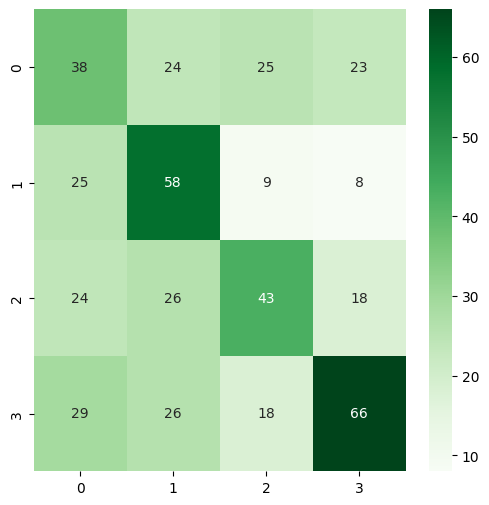

In [23]:
ada1 = AdaBoostClassifier(n_estimators=2000, algorithm="SAMME",random_state=0)
ada1.fit(X_train1,y_train1)
pred_ada1 = ada1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_ada1))
print(classification_report(y_test1, pred_ada1))
print(round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Adaboost',round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100 ])

#### Random Forest

In [24]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train1,y_train1)
        pred_RF = RF.predict(X_test1)
        print(i,j,round(np.sum([y_test1==pred_RF])/len(y_test1),4)*100,"%")

40 2 38.04 %
40 3 36.96 %
40 4 37.169999999999995 %
60 2 37.61 %
60 3 37.61 %
60 4 36.74 %
80 2 38.26 %
80 3 37.39 %
80 4 36.52 %
100 2 38.04 %
100 3 37.39 %
100 4 36.74 %
120 2 38.26 %
120 3 37.169999999999995 %
120 4 36.52 %
140 2 37.61 %
140 3 36.74 %
140 4 36.96 %
160 2 38.26 %
160 3 36.74 %
160 4 36.96 %
180 2 38.04 %
180 3 37.169999999999995 %
180 4 36.74 %
200 2 38.26 %
200 3 37.169999999999995 %
200 4 36.74 %
220 2 37.61 %
220 3 36.96 %
220 4 36.74 %
240 2 37.830000000000005 %
240 3 36.96 %
240 4 36.52 %
260 2 38.26 %
260 3 36.74 %
260 4 36.74 %
280 2 37.830000000000005 %
280 3 36.74 %
280 4 36.52 %
300 2 38.26 %
300 3 36.96 %
300 4 36.52 %
320 2 38.04 %
320 3 36.74 %
320 4 36.09 %
340 2 38.04 %
340 3 36.52 %
340 4 36.09 %
360 2 38.04 %
360 3 36.74 %
360 4 36.3 %
380 2 38.48 %
380 3 37.39 %
380 4 36.3 %
400 2 38.26 %
400 3 37.169999999999995 %
400 4 36.52 %
420 2 38.04 %
420 3 37.61 %
420 4 36.52 %
440 2 38.04 %
440 3 37.169999999999995 %
440 4 36.74 %
460 2 38.48 %
460 3 37.39

              precision    recall  f1-score   support

           0       0.29      0.30      0.29       110
           2       0.39      0.42      0.40       100
           9       0.41      0.48      0.44       111
          11       0.45      0.35      0.39       139

    accuracy                           0.38       460
   macro avg       0.38      0.39      0.38       460
weighted avg       0.39      0.38      0.38       460

38.48 %


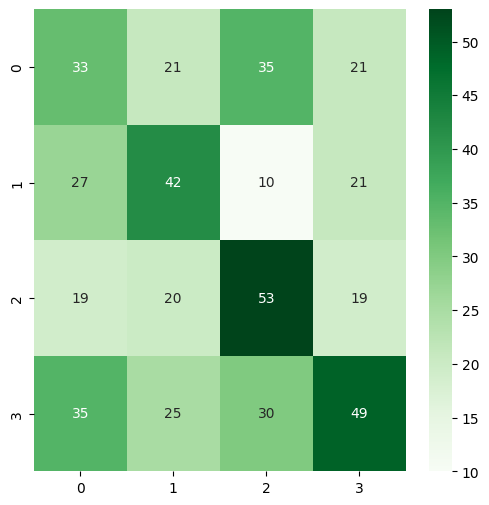

In [25]:
RF1 = RandomForestClassifier(n_estimators=460, max_depth=None,min_samples_split=2, random_state=0)
RF1.fit(X_train1,y_train1)
pred_RF1 = RF1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_RF1))
print(classification_report(y_test1, pred_RF1))
print(round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Random Forest',round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100 ])

#### Logistic Regression

In [26]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train1,y_train1)
                pred_LR = LR.predict(X_test1)
                print(i,j,k,round(np.sum([y_test1==pred_LR])/len(y_test1),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 26.090000000000003 %
l1 liblinear 0.01 40.43 %
l1 liblinear 0.001 40.22 %
l1 saga 0.1 24.349999999999998 %
l1 saga 0.01 28.48 %
l1 saga 0.001 34.35 %
l2 lbfgs 0.1 40.43 %
l2 lbfgs 0.01 40.43 %
l2 lbfgs 0.001 40.43 %
l2 liblinear 0.1 21.740000000000002 %
l2 liblinear 0.01 21.959999999999997 %
l2 liblinear 0.001 39.57 %
l2 newton-cg 0.1 40.22 %
l2 newton-cg 0.01 40.22 %
l2 newton-cg 0.001 40.22 %
l2 sag 0.1 26.96 %
l2 sag 0.01 31.09 %
l2 sag 0.001 33.910000000000004 %
l2 saga 0.1 24.349999999999998 %
l2 saga 0.01 28.48 %
l2 saga 0.001 34.35 %


              precision    recall  f1-score   support

           0       0.27      0.50      0.35       110
           2       0.43      0.63      0.51       100
           9       0.70      0.28      0.40       111
          11       0.55      0.27      0.36       139

    accuracy                           0.40       460
   macro avg       0.49      0.42      0.41       460
weighted avg       0.50      0.40      0.40       460

40.43 %


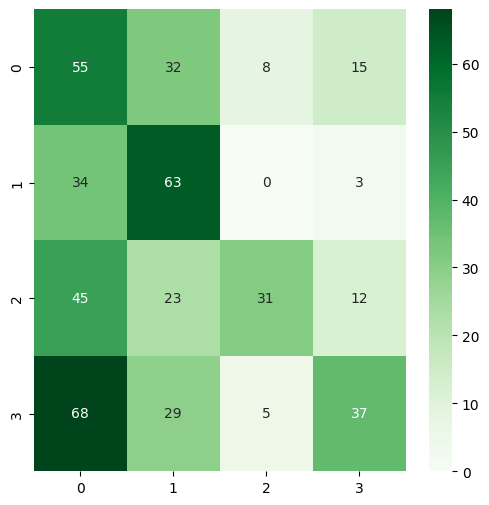

In [27]:
LR1 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.01, max_iter=10000, random_state=0)
LR1.fit(X_train1,y_train1)
pred_LR1 = LR1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_LR1))
print(classification_report(y_test1, pred_LR1))
print(round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Logistic Regression',round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100 ])

# RUN ON DATA SET WITH HISTOGRAM DATA

#### SVM

In [28]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 48.699999999999996 %
squared_hinge l2 48.699999999999996 %
OutputCodeClassifier
hinge l2 38.7 %
squared_hinge l2 44.13 %
OneVsRestClassifier
hinge l2 42.83 %
squared_hinge l2 42.83 %


              precision    recall  f1-score   support

           0       0.41      0.55      0.47       110
           2       0.44      0.42      0.43       100
           9       0.40      0.30      0.34       111
          11       0.66      0.63      0.65       139

    accuracy                           0.49       460
   macro avg       0.48      0.48      0.47       460
weighted avg       0.49      0.49      0.48       460

48.699999999999996 %


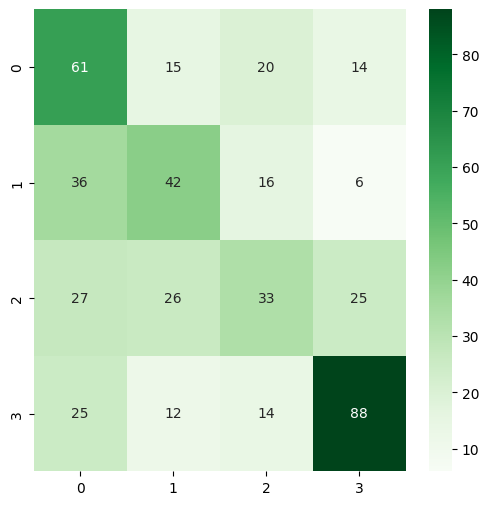

In [29]:
svm2 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train2, y_train2)
pred_svm2 = svm2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_svm2))
print(classification_report(y_test2, pred_svm2))
print(round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'SVM',round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100 ])

#### KNN

In [30]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train2,y_train2)
    pred_knn = neigh.predict(X_test2)
    print(i,round(np.sum([y_test2==pred_knn])/len(y_test2),4)*100,"%")

1 53.480000000000004 %
2 45.43 %
3 49.78 %
4 48.480000000000004 %
5 48.04 %
6 49.57 %
7 49.78 %
8 48.91 %
9 48.91 %
10 47.61 %
11 48.699999999999996 %
12 47.17 %
13 47.39 %
14 47.83 %
15 47.83 %
16 48.91 %
17 46.96 %
18 46.96 %
19 47.61 %
20 47.83 %
21 46.300000000000004 %
22 45.65 %
23 45.22 %
24 46.96 %
25 47.17 %
26 47.83 %
27 46.300000000000004 %
28 46.300000000000004 %
29 46.739999999999995 %
30 46.300000000000004 %
31 46.300000000000004 %
32 46.52 %
33 46.52 %
34 46.96 %
35 45.65 %
36 45.43 %
37 44.57 %
38 43.91 %
39 43.91 %
40 43.91 %
41 44.57 %
42 41.959999999999994 %
43 43.04 %
44 43.7 %
45 43.91 %
46 42.83 %
47 42.17 %
48 43.91 %
49 43.04 %
50 42.83 %


              precision    recall  f1-score   support

           0       0.39      0.65      0.49       110
           2       0.50      0.47      0.48       100
           9       0.45      0.28      0.34       111
          11       0.71      0.57      0.63       139

    accuracy                           0.50       460
   macro avg       0.51      0.49      0.49       460
weighted avg       0.52      0.50      0.50       460

49.78 %


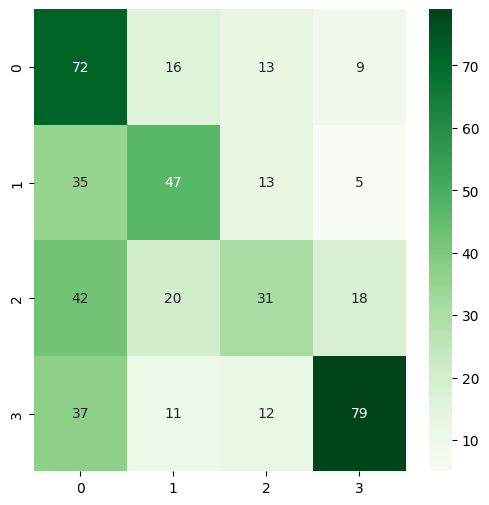

In [31]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train2,y_train2)
pred_knn2 = neigh2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_knn2))
print(classification_report(y_test2, pred_knn2))
print(round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'KNN',round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100 ])

#### Adaboost

In [32]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train2,y_train2)
    pred_ada = ada.predict(X_test2)
    print(i,round(np.sum([y_test2==pred_ada])/len(y_test2),4)*100,"%")

50 55.65 %
100 59.78 %
150 59.78 %
200 58.26 %
250 58.26 %
300 58.26 %
350 58.26 %
400 58.48 %
450 58.26 %
500 58.26 %
550 57.60999999999999 %
600 57.60999999999999 %
650 58.26 %
700 58.040000000000006 %
750 59.35 %
800 58.48 %
850 58.699999999999996 %
900 58.699999999999996 %
950 58.699999999999996 %
1000 59.35 %
1050 58.699999999999996 %
1100 58.48 %
1150 59.13 %
1200 58.91 %
1250 59.78 %
1300 59.57 %
1350 59.57 %
1400 60.0 %
1450 59.57 %
1500 59.78 %
1550 59.35 %
1600 58.699999999999996 %
1650 58.48 %
1700 58.91 %
1750 58.48 %
1800 58.699999999999996 %
1850 59.13 %
1900 58.91 %
1950 59.13 %
2000 59.13 %


              precision    recall  f1-score   support

           0       0.60      0.67      0.64       110
           2       0.55      0.52      0.53       100
           9       0.52      0.55      0.54       111
          11       0.71      0.64      0.67       139

    accuracy                           0.60       460
   macro avg       0.60      0.60      0.59       460
weighted avg       0.60      0.60      0.60       460

60.0 %


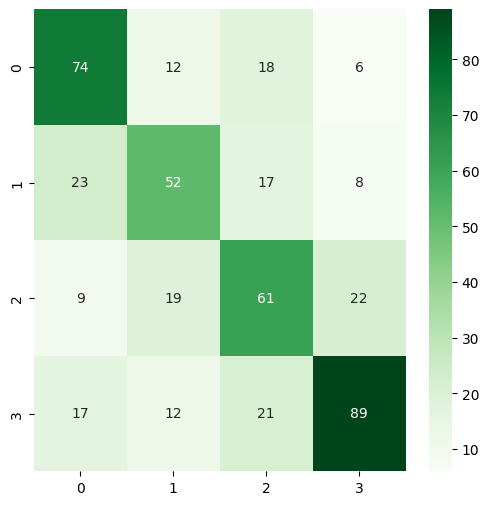

In [33]:
ada2 = AdaBoostClassifier(n_estimators=1400, algorithm="SAMME",random_state=0)
ada2.fit(X_train2,y_train2)
pred_ada2 = ada2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_ada2))
print(classification_report(y_test2, pred_ada2))
print(round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Adaboost',round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100 ])

#### Random Forset

In [34]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train2,y_train2)
        pred_RF = RF.predict(X_test2)
        print(i,j,round(np.sum([y_test2==pred_RF])/len(y_test2),4)*100,"%")

40 2 65.86999999999999 %
40 3 64.13 %
40 4 65.42999999999999 %
60 2 66.74 %
60 3 66.09 %
60 4 65.86999999999999 %
80 2 66.3 %
80 3 65.42999999999999 %
80 4 65.42999999999999 %
100 2 66.74 %
100 3 66.09 %
100 4 65.22 %
120 2 66.74 %
120 3 66.3 %
120 4 65.64999999999999 %
140 2 67.17 %
140 3 67.39 %
140 4 65.64999999999999 %
160 2 66.3 %
160 3 66.96 %
160 4 65.22 %
180 2 67.17 %
180 3 66.3 %
180 4 65.86999999999999 %
200 2 67.17 %
200 3 66.3 %
200 4 66.3 %
220 2 67.39 %
220 3 66.96 %
220 4 65.42999999999999 %
240 2 66.96 %
240 3 67.39 %
240 4 66.3 %
260 2 67.61 %
260 3 67.39 %
260 4 65.86999999999999 %
280 2 67.17 %
280 3 67.17 %
280 4 66.09 %
300 2 66.74 %
300 3 67.17 %
300 4 65.86999999999999 %
320 2 66.74 %
320 3 67.17 %
320 4 66.09 %
340 2 67.17 %
340 3 67.61 %
340 4 66.52 %
360 2 66.74 %
360 3 67.17 %
360 4 66.09 %
380 2 66.52 %
380 3 67.17 %
380 4 66.3 %
400 2 66.74 %
400 3 67.17 %
400 4 66.96 %
420 2 66.96 %
420 3 67.83 %
420 4 66.96 %
440 2 66.74 %
440 3 67.17 %
440 4 66.74 %
460

              precision    recall  f1-score   support

           0       0.66      0.75      0.71       110
           2       0.71      0.62      0.66       100
           9       0.59      0.62      0.61       111
          11       0.73      0.69      0.71       139

    accuracy                           0.67       460
   macro avg       0.67      0.67      0.67       460
weighted avg       0.68      0.67      0.67       460

67.39 %


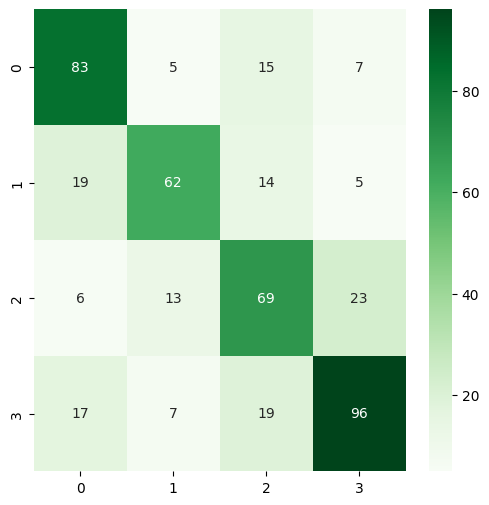

In [35]:
RF2 = RandomForestClassifier(n_estimators=140, max_depth=None,min_samples_split=3, random_state=0)
RF2.fit(X_train2,y_train2)
pred_RF2 = RF2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_RF2))
print(classification_report(y_test2, pred_RF2))
print(round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Random Forest',round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100 ])

#### Logistic Regression

In [36]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train2,y_train2)
                pred_LR = LR.predict(X_test2)
                print(i,j,k,round(np.sum([y_test2==pred_LR])/len(y_test2),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 57.830000000000005 %
l1 liblinear 0.01 51.959999999999994 %
l1 liblinear 0.001 50.64999999999999 %
l1 saga 0.1 53.480000000000004 %
l1 saga 0.01 58.26 %
l1 saga 0.001 55.87 %
l2 lbfgs 0.1 49.13 %
l2 lbfgs 0.01 49.13 %
l2 lbfgs 0.001 49.13 %
l2 liblinear 0.1 56.52 %
l2 liblinear 0.01 56.089999999999996 %
l2 liblinear 0.001 50.43 %
l2 newton-cg 0.1 49.13 %
l2 newton-cg 0.01 48.91 %
l2 newton-cg 0.001 48.91 %
l2 sag 0.1 55.65 %
l2 sag 0.01 56.96 %
l2 sag 0.001 56.3 %
l2 saga 0.1 53.480000000000004 %
l2 saga 0.01 58.26 %
l2 saga 0.001 55.87 %


              precision    recall  f1-score   support

           0       0.62      0.58      0.60       110
           2       0.52      0.55      0.54       100
           9       0.48      0.38      0.42       111
          11       0.65      0.77      0.70       139

    accuracy                           0.58       460
   macro avg       0.57      0.57      0.57       460
weighted avg       0.57      0.58      0.58       460

58.26 %


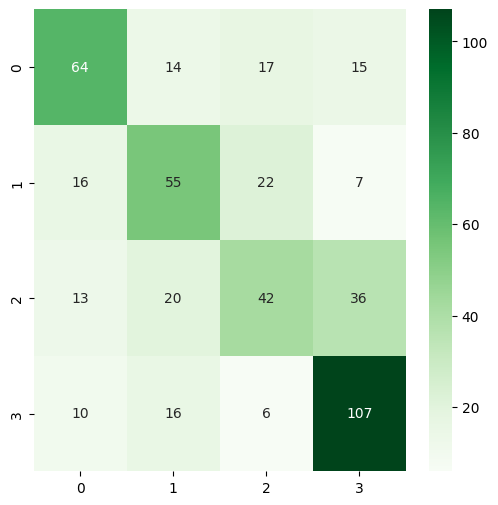

In [37]:
LR2 = LogisticRegression(penalty="l1", solver="saga", tol=0.01, max_iter=10000, random_state=0)
LR2.fit(X_train2,y_train2)
pred_LR2 = LR2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_LR2))
print(classification_report(y_test2, pred_LR2))
print(round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Logistic Regression',round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100 ])

# RUN ON DATA SET WITH LINES, CIRCLES AND HISTOGRAM DATA

#### SVM

In [38]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass


OneVsOneClassifier


hinge l2 47.61 %
squared_hinge l2 47.61 %
OutputCodeClassifier
hinge l2 32.39 %
squared_hinge l2 39.129999999999995 %
OneVsRestClassifier
hinge l2 31.96 %
squared_hinge l2 31.96 %


              precision    recall  f1-score   support

           0       0.42      0.35      0.38       110
           2       0.40      0.52      0.45       100
           9       0.38      0.30      0.34       111
          11       0.63      0.69      0.66       139

    accuracy                           0.48       460
   macro avg       0.46      0.46      0.46       460
weighted avg       0.47      0.48      0.47       460

47.61 %


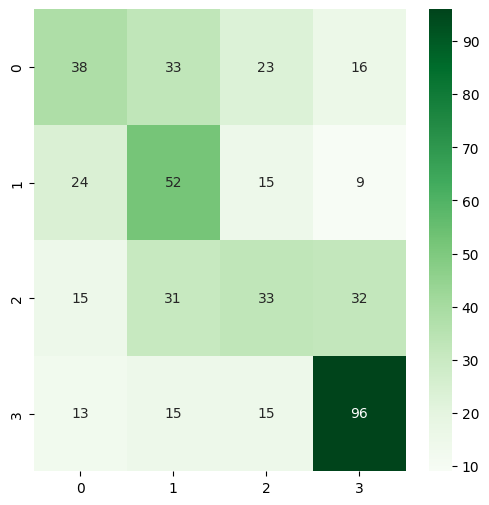

In [39]:
svm3 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train3, y_train3)
pred_svm3 = svm3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_svm3))
print(classification_report(y_test3, pred_svm3))
print(round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'SVM',round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100 ])

#### KNN

In [40]:
for i in range(3,101,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train3,y_train3)
    pred_knn = neigh.predict(X_test3)
    print(i,round(np.sum([y_test3==pred_knn])/len(y_test3),4)*100,"%")


3 49.57 %
5 47.17 %
7 47.83 %
9 47.39 %
11 47.39 %
13 48.04 %
15 47.83 %
17 47.83 %
19 48.04 %
21 47.17 %
23 46.300000000000004 %
25 46.089999999999996 %
27 45.87 %
29 47.61 %
31 46.52 %
33 46.300000000000004 %
35 44.13 %
37 44.57 %
39 45.0 %
41 45.43 %
43 43.91 %
45 43.480000000000004 %
47 43.26 %
49 45.0 %
51 44.57 %
53 42.61 %
55 43.04 %
57 43.91 %
59 43.7 %
61 42.39 %
63 42.17 %
65 42.17 %
67 41.089999999999996 %
69 40.43 %
71 40.22 %
73 40.22 %
75 40.43 %
77 40.22 %
79 40.22 %
81 40.87 %
83 40.43 %
85 39.35 %
87 37.830000000000005 %
89 38.48 %
91 38.48 %
93 39.57 %
95 38.48 %
97 38.04 %
99 37.169999999999995 %


              precision    recall  f1-score   support

           0       0.39      0.69      0.50       110
           2       0.48      0.41      0.44       100
           9       0.50      0.31      0.38       111
          11       0.71      0.55      0.62       139

    accuracy                           0.50       460
   macro avg       0.52      0.49      0.48       460
weighted avg       0.53      0.50      0.49       460

49.57 %


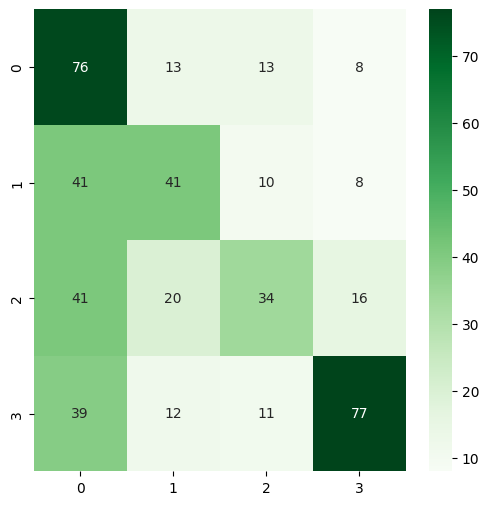

In [41]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train3,y_train3)
pred_knn3 = neigh3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_knn3))
print(classification_report(y_test3, pred_knn3))
print(round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'KNN',round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100 ])

#### ADABOOST

In [42]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
    ada.fit(X_train3,y_train3)
    pred_ada = ada.predict(X_test3)
    print(i,round(np.sum([y_test3==pred_ada])/len(y_test3),4)*100,"%")

50 56.089999999999996 %
100 55.43 %
150 56.3 %
200 56.089999999999996 %
250 58.48 %
300 57.60999999999999 %
350 56.96 %
400 56.96 %
450 57.38999999999999 %
500 59.13 %
550 59.57 %
600 58.91 %
650 59.57 %
700 58.48 %
750 59.35 %
800 60.0 %
850 58.48 %
900 58.91 %
950 60.0 %
1000 60.870000000000005 %
1050 60.42999999999999 %
1100 60.22 %
1150 59.78 %
1200 60.0 %
1250 60.22 %
1300 59.78 %
1350 59.57 %
1400 60.42999999999999 %
1450 60.650000000000006 %
1500 59.35 %
1550 61.3 %
1600 58.91 %
1650 59.35 %
1700 60.22 %
1750 59.78 %
1800 59.57 %
1850 60.650000000000006 %
1900 60.42999999999999 %
1950 61.09 %
2000 60.42999999999999 %


              precision    recall  f1-score   support

           0       0.56      0.67      0.61       110
           2       0.57      0.50      0.53       100
           9       0.55      0.59      0.57       111
          11       0.75      0.65      0.70       139

    accuracy                           0.61       460
   macro avg       0.61      0.61      0.60       460
weighted avg       0.62      0.61      0.61       460

61.09 %


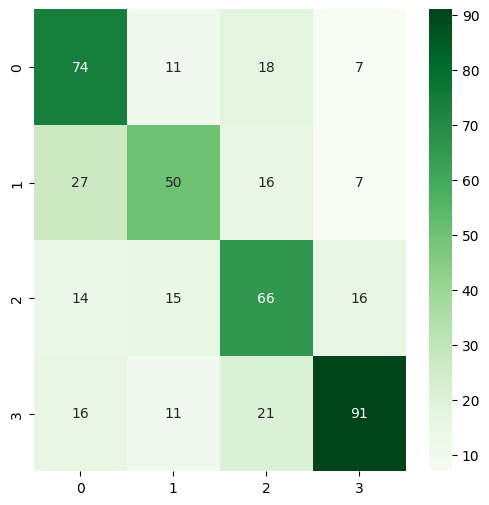

In [43]:
ada3 = AdaBoostClassifier(n_estimators=1950, algorithm="SAMME",random_state=0)
ada3.fit(X_train3,y_train3)
pred_ada3 = ada3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_ada3))
print(classification_report(y_test3, pred_ada3))
print(round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Adaboost',round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100 ])

#### RANDOM FOREST

In [44]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train3,y_train3)
        pred_RF = RF.predict(X_test3)
        print(i,j,round(np.sum([y_test3==pred_RF])/len(y_test3),4)*100,"%")

40 2 65.0 %
40 3 64.13 %
40 4 66.52 %
60 2 65.0 %
60 3 65.42999999999999 %
60 4 65.64999999999999 %
80 2 67.17 %
80 3 65.22 %
80 4 66.74 %
100 2 66.09 %
100 3 66.96 %
100 4 66.09 %
120 2 67.39 %
120 3 66.52 %
120 4 66.52 %
140 2 66.96 %
140 3 67.17 %
140 4 66.74 %
160 2 66.96 %
160 3 68.04 %
160 4 66.96 %
180 2 66.74 %
180 3 67.83 %
180 4 67.83 %
200 2 66.74 %
200 3 67.61 %
200 4 67.61 %
220 2 66.96 %
220 3 66.96 %
220 4 67.83 %
240 2 66.96 %
240 3 66.96 %
240 4 67.83 %
260 2 66.96 %
260 3 66.96 %
260 4 68.04 %
280 2 66.3 %
280 3 66.74 %
280 4 68.26 %
300 2 67.39 %
300 3 67.17 %
300 4 68.04 %
320 2 67.39 %
320 3 66.3 %
320 4 67.83 %
340 2 67.61 %
340 3 66.52 %
340 4 68.04 %
360 2 67.39 %
360 3 66.52 %
360 4 67.83 %
380 2 67.17 %
380 3 67.17 %
380 4 68.26 %
400 2 67.39 %
400 3 67.17 %
400 4 68.47999999999999 %
420 2 67.17 %
420 3 67.83 %
420 4 68.47999999999999 %
440 2 67.17 %
440 3 67.61 %
440 4 68.26 %
460 2 67.17 %
460 3 67.39 %
460 4 68.26 %
480 2 66.96 %
480 3 67.61 %
480 4 68.4799

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       110
           2       0.72      0.65      0.68       100
           9       0.59      0.64      0.61       111
          11       0.75      0.71      0.73       139

    accuracy                           0.68       460
   macro avg       0.69      0.68      0.68       460
weighted avg       0.69      0.68      0.69       460

68.47999999999999 %


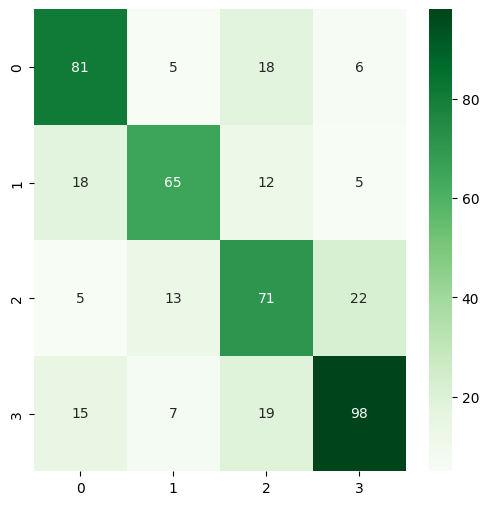

In [45]:
RF3 = RandomForestClassifier(n_estimators=400, max_depth=None,min_samples_split=4, random_state=0)
RF3.fit(X_train3,y_train3)
pred_RF3 = RF3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_RF3))
print(classification_report(y_test3, pred_RF3))
print(round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Random Forest',round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100 ])

#### LOGISTIC REGRESSION

In [46]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
                LR.fit(X_train3,y_train3)
                pred_LR = LR.predict(X_test3)
                print(i,j,k,round(np.sum([y_test3==pred_LR])/len(y_test3),4)*100,"%")
            except:
                pass

l1 liblinear 0.1 56.74 %
l1 liblinear 0.01 53.04 %
l1 liblinear 0.001 50.870000000000005 %
l1 saga 0.1 52.61 %
l1 saga 0.01 56.3 %
l1 saga 0.001 55.22 %
l2 lbfgs 0.1 50.0 %
l2 lbfgs 0.01 50.0 %
l2 lbfgs 0.001 50.0 %
l2 liblinear 0.1 55.22 %
l2 liblinear 0.01 55.65 %
l2 liblinear 0.001 50.870000000000005 %
l2 newton-cg 0.1 48.04 %
l2 newton-cg 0.01 48.699999999999996 %
l2 newton-cg 0.001 48.699999999999996 %
l2 sag 0.1 55.43 %
l2 sag 0.01 56.089999999999996 %
l2 sag 0.001 55.43 %
l2 saga 0.1 52.61 %
l2 saga 0.01 56.3 %
l2 saga 0.001 55.22 %


              precision    recall  f1-score   support

           0       0.57      0.58      0.58       110
           2       0.55      0.51      0.53       100
           9       0.47      0.32      0.38       111
          11       0.62      0.79      0.69       139

    accuracy                           0.57       460
   macro avg       0.55      0.55      0.55       460
weighted avg       0.56      0.57      0.55       460

56.74 %


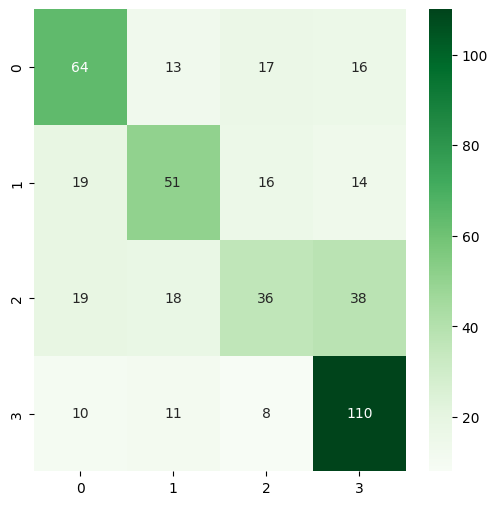

In [47]:
LR3 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state = 0)
LR3.fit(X_train3,y_train3)
pred_LR3 = LR3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_LR3))
print(classification_report(y_test3, pred_LR3))
print(round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Logistic Regression',round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100 ])

# RUN ON LINES CIRCLES AND HIST WITH PCA

In [48]:
pca1=PCA(n_components=100)
X_train4=pca1.fit_transform(X_train3)
X_test4=pca1.transform(X_test3)
final_test_X4 = pca1.transform(final_test_X)
y_train4 = y_train3
y_test4 = y_test3

In [72]:
print(X_train4.shape)
print(X_test4.shape)
print(final_test_X4.shape)


(1073, 100)
(460, 100)
(383, 100)


In [76]:
cs = [i for i in range(100)]
df_X4_final_test = pd.DataFrame(final_test_X4,columns=cs)
df_X4_final_test['class_number']=final_test_y
df_X4_final_test.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class_number
0,28246.205763,-843.807038,-46.007739,-95.305677,-101.223269,-64.211995,-248.771656,-335.086622,-188.979868,-766.604241,...,120.949412,-7.659435,-24.183418,180.480598,111.549484,7.872206,-99.754496,171.250702,-5.758994,0.0
1,-18565.165189,-1656.412282,-1566.222301,-1210.447207,-597.735416,-849.853459,-1569.140324,-573.360205,-734.613236,-1230.928417,...,86.923505,-12.193961,237.957197,-100.226733,-46.432028,-15.178931,233.226818,20.381709,156.290296,0.0
2,-1875.561190,-1347.274534,-1234.446292,-417.127232,-651.109315,-139.365285,-453.101203,-78.455544,-232.485622,-31.350652,...,27.632003,62.523709,14.476808,-205.870211,-97.900576,-21.367996,66.171548,-72.588545,11.494915,0.0
3,22544.237641,-1425.796329,-334.144054,-133.699910,-231.888712,-77.758664,-291.654221,-279.567087,-139.055436,-494.287252,...,-140.577623,-174.109238,-302.354135,35.125789,31.837159,108.668070,-36.828880,61.691545,32.191711,0.0
4,-18229.021833,-591.011797,-1848.901638,-269.533752,-987.503390,-1493.277141,988.737170,1838.489600,-396.128696,433.423300,...,-157.465613,-22.348531,-318.252460,-112.961734,-124.615956,-152.521018,156.004247,-68.859264,-127.008693,0.0


In [77]:
df_X4_final_test.to_csv('df_X4_final_test.csv', index=False)

#### SVM

In [50]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass


OneVsOneClassifier


hinge l2 33.48 %
squared_hinge l2 33.48 %
OutputCodeClassifier
hinge l2 36.96 %
squared_hinge l2 38.48 %
OneVsRestClassifier
hinge l2 24.349999999999998 %
squared_hinge l2 24.349999999999998 %


              precision    recall  f1-score   support

           0       0.41      0.18      0.25       110
           2       0.17      0.38      0.24       100
           9       0.33      0.14      0.19       111
          11       0.27      0.28      0.27       139

    accuracy                           0.24       460
   macro avg       0.29      0.24      0.24       460
weighted avg       0.30      0.24      0.24       460

24.349999999999998 %


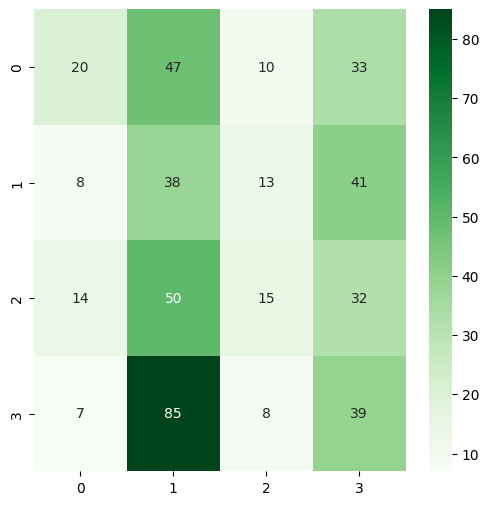

In [51]:
svm4 =  OneVsRestClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train4, y_train4)
pred_svm4 = svm4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_svm4))
print(classification_report(y_test4, pred_svm4))
print(round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 100', 'SVM',round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100 ])

#### KNN

In [52]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train4,y_train4)
    pred_knn = neigh.predict(X_test4)
    print(i,round(np.sum([y_test4==pred_knn])/len(y_test4),4)*100,"%")

1 52.17 %
2 43.480000000000004 %
3 49.57 %
4 47.61 %
5 47.39 %
6 48.04 %
7 48.26 %
8 48.04 %
9 50.870000000000005 %
10 46.300000000000004 %
11 49.35 %
12 49.13 %
13 49.13 %
14 48.04 %
15 48.26 %
16 47.61 %
17 48.26 %
18 48.26 %
19 47.39 %
20 48.699999999999996 %
21 48.04 %
22 47.61 %
23 47.17 %
24 48.480000000000004 %
25 48.480000000000004 %
26 47.83 %
27 47.83 %
28 46.739999999999995 %
29 47.83 %
30 47.17 %
31 45.87 %
32 46.300000000000004 %
33 46.739999999999995 %
34 47.39 %
35 46.739999999999995 %
36 46.52 %
37 45.43 %
38 45.0 %
39 44.57 %
40 45.22 %
41 44.35 %
42 43.480000000000004 %
43 43.04 %
44 43.7 %
45 43.480000000000004 %
46 44.35 %
47 44.35 %
48 44.13 %
49 43.91 %
50 45.0 %


              precision    recall  f1-score   support

           0       0.50      0.55      0.52       110
           2       0.46      0.49      0.48       100
           9       0.43      0.35      0.39       111
          11       0.64      0.66      0.65       139

    accuracy                           0.52       460
   macro avg       0.51      0.51      0.51       460
weighted avg       0.52      0.52      0.52       460

52.17 %


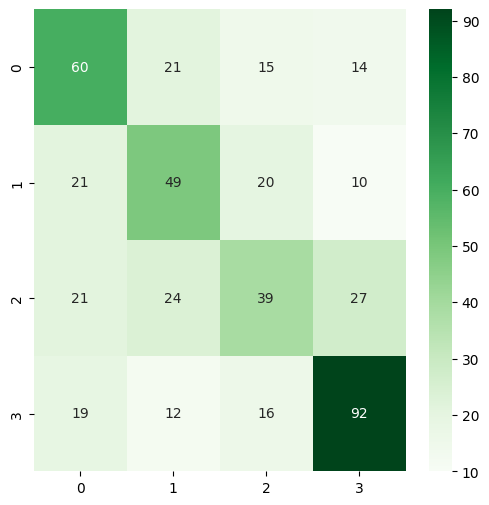

In [53]:
neigh4 = KNeighborsClassifier(n_neighbors=1)
neigh4.fit(X_train4,y_train4)
pred_knn4 = neigh4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_knn4))
print(classification_report(y_test4, pred_knn4))
print(round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 100', 'KNN',round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100 ])

#### Adaboost

In [54]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
    ada.fit(X_train4,y_train4)
    pred_ada = ada.predict(X_test4)
    print(i,round(np.sum([y_test4==pred_ada])/len(y_test4),4)*100,"%")

50 51.300000000000004 %
100 50.22 %
150 50.43 %
200 53.04 %
250 51.959999999999994 %
300 53.480000000000004 %
350 52.39 %
400 51.959999999999994 %
450 51.300000000000004 %
500 52.17 %
550 52.17 %
600 53.7 %
650 50.870000000000005 %
700 52.39 %
750 53.04 %
800 52.17 %
850 53.7 %
900 52.61 %
950 52.39 %
1000 51.739999999999995 %
1050 51.739999999999995 %
1100 51.519999999999996 %
1150 52.39 %
1200 53.04 %
1250 52.17 %
1300 53.480000000000004 %
1350 53.7 %
1400 53.26 %
1450 53.480000000000004 %
1500 53.26 %
1550 52.83 %
1600 53.7 %
1650 54.35 %
1700 55.22 %
1750 54.56999999999999 %
1800 54.56999999999999 %
1850 54.56999999999999 %
1900 54.35 %
1950 54.13 %
2000 54.56999999999999 %


              precision    recall  f1-score   support

           0       0.52      0.54      0.53       110
           2       0.52      0.50      0.51       100
           9       0.39      0.41      0.40       111
          11       0.63      0.60      0.61       139

    accuracy                           0.52       460
   macro avg       0.51      0.51      0.51       460
weighted avg       0.52      0.52      0.52       460

51.739999999999995 %


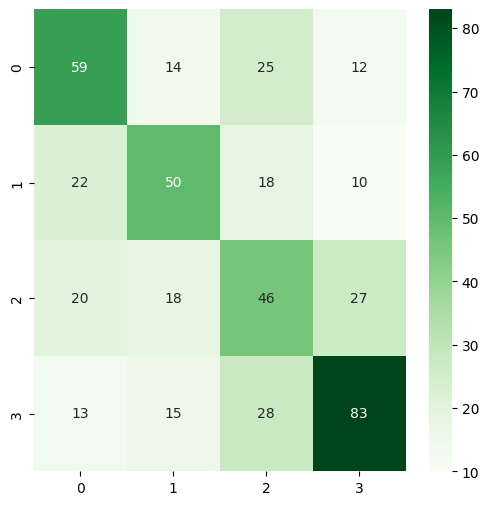

In [55]:
ada4 = AdaBoostClassifier(n_estimators=1050, algorithm="SAMME",random_state=0)
ada4.fit(X_train4,y_train4)
pred_ada4 = ada4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_ada4))
print(classification_report(y_test4, pred_ada4))
print(round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 100', 'Adaboost',round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100 ])

#### Random Forest

In [56]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train4,y_train4)
        pred_RF = RF.predict(X_test4)
        print(i,j,round(np.sum([y_test4==pred_RF])/len(y_test4),4)*100,"%")

40 2 59.35 %
40 3 57.38999999999999 %
40 4 59.35 %
60 2 59.13 %
60 3 59.35 %
60 4 58.040000000000006 %
80 2 60.42999999999999 %
80 3 60.0 %
80 4 59.13 %
100 2 60.0 %
100 3 61.519999999999996 %
100 4 60.650000000000006 %
120 2 59.13 %
120 3 61.519999999999996 %
120 4 61.09 %
140 2 59.35 %
140 3 61.519999999999996 %
140 4 60.22 %
160 2 58.48 %
160 3 60.42999999999999 %
160 4 60.22 %
180 2 58.91 %
180 3 61.519999999999996 %
180 4 60.42999999999999 %
200 2 58.48 %
200 3 60.0 %
200 4 60.870000000000005 %
220 2 58.91 %
220 3 59.78 %
220 4 60.650000000000006 %
240 2 60.0 %
240 3 60.870000000000005 %
240 4 61.3 %
260 2 59.78 %
260 3 60.22 %
260 4 61.739999999999995 %
280 2 59.78 %
280 3 60.22 %
280 4 61.519999999999996 %
300 2 60.22 %
300 3 60.42999999999999 %
300 4 60.870000000000005 %
320 2 61.09 %
320 3 60.22 %
320 4 61.3 %
340 2 61.09 %
340 3 60.650000000000006 %
340 4 61.519999999999996 %
360 2 61.519999999999996 %
360 3 60.650000000000006 %
360 4 61.739999999999995 %
380 2 60.87000000000

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       110
           2       0.53      0.52      0.53       100
           9       0.54      0.52      0.53       111
          11       0.66      0.67      0.66       139

    accuracy                           0.60       460
   macro avg       0.59      0.59      0.59       460
weighted avg       0.60      0.60      0.60       460

59.78 %


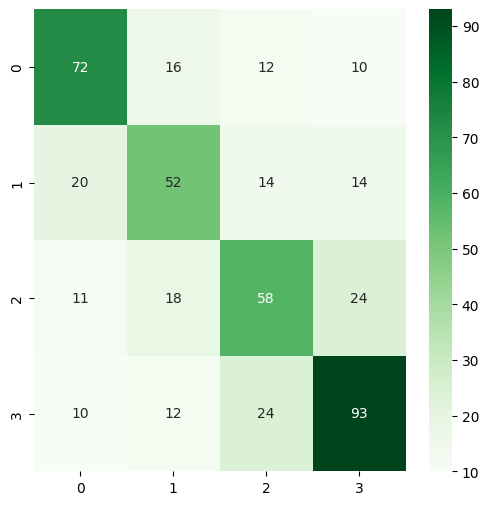

In [57]:
RF4 = RandomForestClassifier(n_estimators=440, max_depth=None,min_samples_split=3, random_state=0)
RF4.fit(X_train4,y_train4)
pred_RF4 = RF4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_RF4))
print(classification_report(y_test4, pred_RF4))
print(round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 100', 'Random Forest',round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100 ])

#### Logistic Regression

In [58]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
                LR.fit(X_train4,y_train4)
                pred_LR = LR.predict(X_test4)
                print(i,j,k,round(np.sum([y_test4==pred_LR])/len(y_test4),4)*100,"%")
            except:
                pass

l1

 liblinear 0.1 56.089999999999996 %
l1 liblinear 0.01 55.00000000000001 %
l1 liblinear 0.001 54.779999999999994 %
l1 saga 0.1 52.61 %
l1 saga 0.01 54.56999999999999 %
l1 saga 0.001 54.779999999999994 %
l2 lbfgs 0.1 50.22 %
l2 lbfgs 0.01 50.22 %
l2 lbfgs 0.001 50.22 %
l2 liblinear 0.1 51.739999999999995 %
l2 liblinear 0.01 50.22 %
l2 liblinear 0.001 53.26 %
l2 newton-cg 0.1 50.43 %
l2 newton-cg 0.01 50.43 %
l2 newton-cg 0.001 50.43 %
l2 sag 0.1 53.910000000000004 %
l2 sag 0.01 54.35 %
l2 sag 0.001 52.61 %
l2 saga 0.1 52.61 %
l2 saga 0.01 54.56999999999999 %
l2 saga 0.001 54.779999999999994 %


              precision    recall  f1-score   support

           0       0.60      0.56      0.58       110
           2       0.49      0.49      0.49       100
           9       0.50      0.38      0.43       111
          11       0.61      0.76      0.67       139

    accuracy                           0.56       460
   macro avg       0.55      0.55      0.54       460
weighted avg       0.55      0.56      0.55       460

56.089999999999996 %


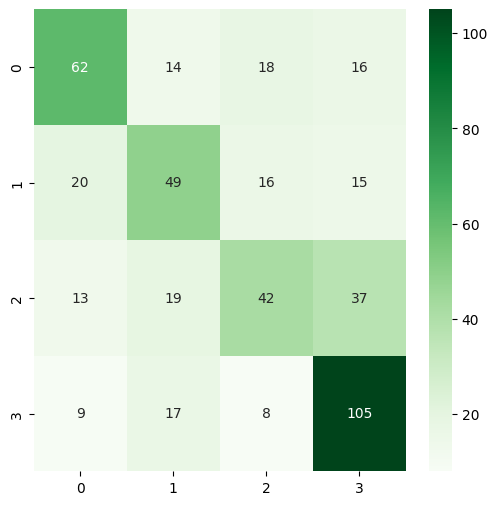

In [59]:
LR4 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state = 0)
LR4.fit(X_train4,y_train4)
pred_LR4 = LR4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_LR4))
print(classification_report(y_test4, pred_LR4))
print(round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 100', 'Logistic Regression',round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100 ])

In [60]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [61]:
df

,df_type,classifier,accuracy
0,lines and circles,SVM,36.74
1,lines and circles,KNN,41.09
2,lines and circles,Adaboost,44.57
3,lines and circles,Random Forest,38.48
4,lines and circles,Logistic Regression,40.43
5,histogram,SVM,48.70
6,histogram,KNN,49.78
7,histogram,Adaboost,60.00
8,histogram,Random Forest,67.39
9,histogram,Logistic Regression,58.26


In [62]:

filenames = ['svm1.sav','svm2.sav','svm3.sav','svm4.sav','knn1.sav','knn2.sav','knn3.sav','knn4.sav',
             'ada1.sav','ada2.sav','ada3.sav','ada4.sav','RF1.sav','RF2.sav','RF3.sav','RF4.sav',
             'LR1.sav','LR2.sav','LR3.sav','LR4.sav']
models= [svm1,svm2,svm3,svm4,neigh1,neigh2,neigh3,neigh4,
         ada1,ada2,ada3,ada4,RF1,RF2,RF3,RF4,LR1,LR2,LR3,LR4]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))

In [63]:
final_test_X4

array([[ 2.82462058e+04, -8.43807038e+02, -4.60077393e+01, ...,
        -9.97544962e+01,  1.71250702e+02, -5.75899426e+00],
       [-1.85651652e+04, -1.65641228e+03, -1.56622230e+03, ...,
         2.33226818e+02,  2.03817087e+01,  1.56290296e+02],
       [-1.87556119e+03, -1.34727453e+03, -1.23444629e+03, ...,
         6.61715479e+01, -7.25885447e+01,  1.14949147e+01],
       ...,
       [ 1.73954276e+04, -1.31135272e+03, -5.37743877e+02, ...,
        -6.40114879e+01, -9.23206802e+01,  9.65678677e+01],
       [-3.71762953e+03, -1.29235058e+03, -1.32086581e+03, ...,
        -1.06433925e+02,  3.73284338e+01,  7.08705159e+02],
       [-1.95179797e+04, -4.30432779e+03,  2.28399511e+04, ...,
         7.72248832e+01,  7.72240878e+01, -9.37839653e+01]])

(383, 100)

In [64]:
# svm3 = pickle.load(open('svm3.sav', 'rb'))
# neigh3 = pickle.load(open('knn3.sav', 'rb'))
# ada3 = pickle.load(open('ada3.sav', 'rb'))
# RF3 = pickle.load(open('RF3.sav', 'rb'))
# LR3 = pickle.load(open('LR3.sav', 'rb'))

In [65]:
# # combo model

# weights=[47.61,49.57,61.09,68.48,56.74]
# normalizer = 1 / float(sum(weights) )
# for i in range(len(weights)):
#     weights[i] = normalizer * weights[i]
# # print(weights)



# svm3.fit(X_train3,y_train3)
# pred_svm3= svm3.predict(X_test3)

# neigh3.fit(X_train3,y_train3)
# pred_knn3= neigh3.predict(X_test3)

# ada3.fit(X_train3,y_train3)
# pred_ada3= ada3.predict(X_test3)

# RF3.fit(X_train3,y_train3)
# pred_RF3= RF3.predict(X_test3)

# LR3.fit(X_train3,y_train3)
# pred_LR3= LR3.predict(X_test3)


In [66]:
# # def most_frequent(List):
# #     occurence_count = Counter(List)
    
# #     return occurence_count.most_common(1)[0][0]

# def find_best(l,weight):
#     classes = [0]*12
#     ws = [0]*12
#     for i in range(len(l)):
#         classes[l[i]]+=1
#         ws[l[i]]+=weight[i]

#     best = -1
#     for i in range(len(classes)):
#         if classes[i]>=3:
#             best = i
#     if best ==-1:
#         maxx = -1
#         for i in range(len(ws)):       
#             if ws[i]>maxx:
#                 maxx = ws[i]
#                 best = i
#     return best



    

In [67]:
# over_all=[]
# preds=[pred_svm3,pred_knn3,pred_ada3,pred_RF3,pred_LR3]
# for i in range(len(y_test3)):
#     p=[]
#     for j in preds:
#         p.append(j[i])
#     over_all.append(p)
   

# final_pred =[]
# for i in over_all:
#     c = find_best(i,weights)
#     final_pred.append(c)
#     print(i,c)
# # print(final_pred)

In [68]:
# Confusion_Matrix(confusion_matrix(y_test3,final_pred))
# print(classification_report(y_test3, final_pred))
# print(round(np.sum([y_test3==final_pred])/len(y_test3),4)*100,"%")
# # results.append(['lines, circle, and histogram PCA 0.99', 'Logistic Regression',round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100 ])

In [69]:

# import necessary packages 
# import cv2 
# import numpy as np
# import matplotlib.pyplot as plt 
# import math
  
# # load image 
# image = cv2.imread('boxes 1.jpg',cv2.COLOR_BGR2RGB) 
# # cv2.imshow("image",image)
# # cv2.waitKey(0) 

# # histogram color https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/


# # chans = cv2.split(image)
# # colors = ("b", "g", "r")
# # plt.figure()
# # plt.title("'Flattened' Color Histogram")
# # plt.xlabel("Bins")
# # plt.ylabel("# of Pixels")
# # # loop over the image channels
# # for (chan, color) in zip(chans, colors):
# # 	# create a histogram for the current channel and plot it
# # 	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
# # 	plt.plot(hist, color=color)
# # 	plt.xlim([0, 256])
# # plt.show()


# #https://datacarpentry.org/image-processing/05-creating-histograms.html

# histogram_r, bin_edges = np.histogram(image[:, :, 0], bins=256, range=(0, 256)) 
# print(histogram_r)
# histogram_g, bin_edges = np.histogram(image[:, :, 1], bins=256, range=(0, 256)) 
# print(histogram_g)
# histogram_b, bin_edges = np.histogram(image[:, :, 2], bins=256, range=(0, 256)) 
# print(histogram_b)

# for i in histogram_r:
#     print(i)


# # # edges canny https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
	
# # edges = cv2.Canny(image,100,200)
# # plt.subplot(121),plt.imshow(image)
# # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# # plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# # plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# # plt.show()


# # # hough line https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
# dst = cv2.Canny(image, 50, 200, None, 3)
# cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

# lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# print(lines.shape)
# print(len(lines))

# print(image.flatten())
# print(dst.flatten())
# # if lines is not None:
# #     for i in range(0, len(lines)):
# #         rho = lines[i][0][0]
# #         theta = lines[i][0][1]
# #         a = math.cos(theta)
# #         b = math.sin(theta)
# #         x0 = a * rho
# #         y0 = b * rho
# #         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

# #         plt.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
# # plt.show()

# # # #hough circle https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

# # output = image.copy()
# # cv2.imshow("output",output)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 5)
# rows = gray.shape[0]
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
#                 param1=100, param2=30,
#                 minRadius=20, maxRadius=200)
# # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
# print(circles.shape[1])
# # # if circles is not None:
# # # 	# convert the (x, y) coordinates and radius of the circles to integers
# # # 	circles = np.round(circles[0, :]).astype("int")
# # # 	# loop over the (x, y) coordinates and radius of the circles
# # # 	for (x, y, r) in circles:
# # # 		# draw the circle in the output image, then draw a rectangle
# # # 		# corresponding to the center of the circle
# # # 		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
# # # 		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
# # # 	# show the output image
# # # cv2.imshow("output",output)
# # # cv2.waitKey(0) 
# # # cv2.imshow("output", np.hstack([image, output]))
# # # cv2.waitKey(0) 

